In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython import get_ipython
ipy = get_ipython()
if ipy is not None:
    ipy.run_line_magic('matplotlib', 'inline')

In [42]:
img = cv2.imread('D:\Dev\OpenCV\images\car_plate.jpg')

In [43]:
def display(img):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

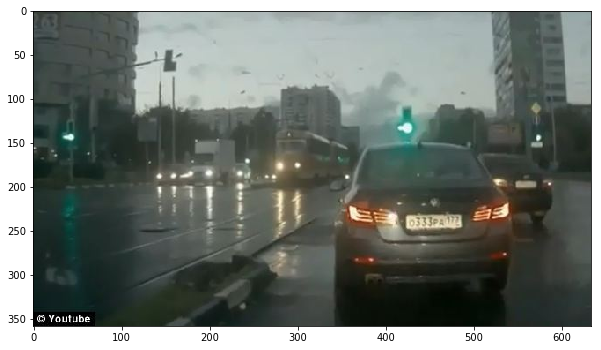

In [44]:
display(img)

In [45]:
plate_cascade = \
    cv2.CascadeClassifier('D:\Dev\OpenCV\data\haarcascades\haarcascade_russian_plate_number.xml')

In [49]:
def detect_plate(img):
    plate_img = img.copy()
    plate_rect = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.3, minNeighbors=3)
    
    for (x, y, w, h) in plate_rect:
        cv2.rectangle(plate_img, (x, y), (x+w, y+h), (0, 0, 255), 4)
    
    return plate_img

In [50]:
result = detect_plate(img)

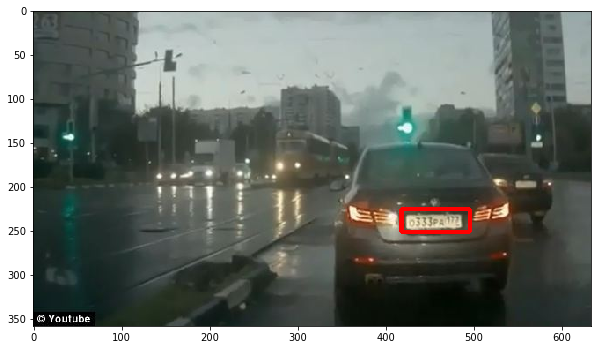

In [51]:
display(result)

In [71]:
def detect_and_blur_plate(img):
    plate_img = img.copy()
    roi = img.copy()
    plate_rect = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.3, minNeighbors=3)
    for (x, y, w, h) in plate_rect:
        roi = roi[y:y+h, x:x+w]
        blurred_roi = cv2.medianBlur(roi, 7)
        plate_img[y:y+h, x:x+w] = blurred_roi
    return plate_img

In [70]:
result = detect_and_blur_plate(img)

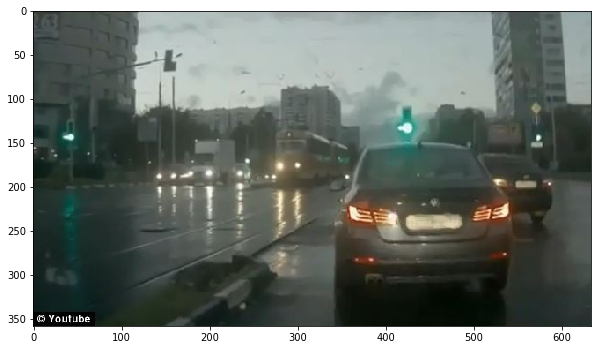

In [72]:
display(result)